## 4 different users with same tracks + played_at 

In [96]:
import pandas as pd
import numpy as np
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

df = pd.read_csv('played_out.csv', index_col=0)

# Position 0 and 1 have been imputed with placeholder values; filter them out
only_correct = df[df['position'] > 1].copy()
only_correct['played_at'] = pd.to_datetime(only_correct['played_at'], format='ISO8601')
only_correct['played_at'] = only_correct['played_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Check for users with exact duplicates in played_at, position and track.id
duplicates = only_correct.groupby(['played_at', 'track.id'])['user'].agg(
    user_count='nunique', 
    user_list=lambda x: list(set(list(x)))
).reset_index()

all_files = duplicates[duplicates['user_count'] == 4].reset_index(drop=True)
all_files_users = set(all_files.user_list.sum())
all_files_users

{'19befa2d20a544b3819a1236cf7536c4_Harsh1',
 '48ff0874c22542e48ae7bb2b43f708be_Harsh2',
 'b3a05964788f4433a57a6113f54418e2_AnirudhParameswaran',
 'b5890668a00444daad40dd33ab28f9c0_AnirudhParameswaran',
 'cff6b6a2d3d44bb7be43ac90cc6283b3_Harsh4',
 'd5d9baabb48d4c09959ab4abef8cb54a_AnirudhParameswaran',
 'e6a6cc7b1aa84cf28e6b2b3d475bfe40_AnirudhParameswaran',
 'f131564c8f17444c8e0dd7274c994ddc_Harshh3'}

## 2 different users with same tracks + played_at

In [97]:
two_files = duplicates[duplicates['user_count'] == 2].reset_index(drop=True)
two_files_users = set(two_files.user_list.sum())
split = pd.DataFrame(two_files['user_list'].to_list(), columns=['user1', 'user2']).drop_duplicates().reset_index(drop=True)
split

,user1,user2
0,e08842478de84103a789b03eb2e48b2a_Maike,3c2742f8ee5b44b2bdeda3778259a80b_Maike
1,e873f35842484d38b61cbd8d81f02f66_Hannah,24bebb12512f476a8e08b14a1aaa08ea_Hannah
2,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,af56d3b2b90948fc9306ba75d3304a55_Andy
3,d78a185d41ba4097b0601c57ca3dcfd0_Thomas,b32e896539eb4b25856361076a3d14c1_Daniel


## Edge case - one track is different but the rest is the exact same - removed

In [98]:
user_1 = df[df['user'] == '65cbd7ca2e8f4589bb9edc3d8319f73d_Jay'][['user','position', 'played_at', 'track.name']].sort_values('played_at').reset_index(drop=True)
user_2 = df[df['user'] == 'af56d3b2b90948fc9306ba75d3304a55_Andy'][['user','position', 'played_at', 'track.name']].sort_values('played_at').reset_index(drop=True)
merged = pd.merge(user_1, user_2, on=['played_at', 'track.name'], how='outer', suffixes=('_Jay', '_Andy'))
merged

,user_Jay,position_Jay,played_at,track.name,user_Andy,position_Andy
0,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,0.0,2025-10-1T01:00:00:000Z,"Kick, Push",af56d3b2b90948fc9306ba75d3304a55_Andy,0.0
1,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,1.0,2025-10-1T02:00:00:000Z,INDUSTRY BABY (feat. Jack Harlow),af56d3b2b90948fc9306ba75d3304a55_Andy,1.0
2,NaN,NaN,2025-12-27T14:21:16.084Z,Old Town Road (feat. Billy Ray Cyrus) - Remix,af56d3b2b90948fc9306ba75d3304a55_Andy,2.0
3,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,2.0,2025-12-27T14:30:34.094Z,Ransom,af56d3b2b90948fc9306ba75d3304a55_Andy,3.0
4,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,3.0,2025-12-27T14:32:31.530Z,STAY (with Justin Bieber),af56d3b2b90948fc9306ba75d3304a55_Andy,4.0
5,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,4.0,2025-12-27T14:32:53.657Z,Moonlight,af56d3b2b90948fc9306ba75d3304a55_Andy,5.0
6,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,5.0,2025-12-27T14:33:45.270Z,Blinding Lights,af56d3b2b90948fc9306ba75d3304a55_Andy,6.0
7,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,6.0,2025-12-27T14:33:50.697Z,Mood (feat. iann dior),af56d3b2b90948fc9306ba75d3304a55_Andy,7.0
8,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,7.0,2025-12-27T14:36:27.087Z,HOLIDAY,af56d3b2b90948fc9306ba75d3304a55_Andy,8.0
9,65cbd7ca2e8f4589bb9edc3d8319f73d_Jay,8.0,2025-12-27T14:38:48.517Z,Lovin On Me,af56d3b2b90948fc9306ba75d3304a55_Andy,9.0


## Final users to remove - retain one user and remove all copies

In [99]:
users_to_remove = [
    '48ff0874c22542e48ae7bb2b43f708be_Harsh2',
    'f131564c8f17444c8e0dd7274c994ddc_Harshh3',
    'cff6b6a2d3d44bb7be43ac90cc6283b3_Harsh4',
    'b5890668a00444daad40dd33ab28f9c0_AnirudhParameswaran',
    'd5d9baabb48d4c09959ab4abef8cb54a_AnirudhParameswaran',
    'e6a6cc7b1aa84cf28e6b2b3d475bfe40_AnirudhParameswaran',
    '3c2742f8ee5b44b2bdeda3778259a80b_Maike',
    '24bebb12512f476a8e08b14a1aaa08ea_Hannah',
    'af56d3b2b90948fc9306ba75d3304a55_Andy',
    'b32e896539eb4b25856361076a3d14c1_Daniel'
]

df = df[~df['user'].isin(users_to_remove)].copy()
df.user.nunique()

79

In [100]:
## Function to extract artist names
# text: str - string representation of list of dicts of length equal to number of artists
def get_artist(text):
    artists = ast.literal_eval(text)  # list (artists) containing (artists) dictionaries
    return ", ".join(artist['name'] for artist in artists)

# track.type : always same value 'track'
# track.is_local : always same value 'local'
# track.track_number : position on its original album (not relevant for our analysis)
df.drop(columns = ['track.type', 'track.is_local', 'track.track_number'], inplace=True)

# extract artist names from 'track.artists' column
df['artist'] = df['track.artists'].apply(get_artist)

# drop the original 'track.artists' column
df.drop(columns = ['track.artists'], inplace=True)

df.rename(columns={'track.duration_ms':'duration_ms', 'track.explicit':'explicit', 'track.id':'track_id', 'track.name':'track_name', 'track.popularity':'popularity',
                'accousticness':'acousticness'}, inplace=True)

genre_mapping = {
    1: 'Pop & Mainstream',
    2: 'Urban & Contemporary',
    3: 'Electronic & Beat-Based',
    4: 'Rock & Heavy',
    5: 'Roots, Jazz & Classical Traditions'
}

df['genre_label'] = df['first_genre'].map(genre_mapping)

df.head()

,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,age,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist,genre_label
1,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,45,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.58800,0.793,0.608,0.861000,6.0,0.0991,-11.638,0.0,0.0673,124.988,0.118,Ben Klock,Electronic & Beat-Based
2,1,2025-10-1T02:00:00:000Z,175238,True,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),85,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.00383,0.561,0.965,0.000007,7.0,0.3710,-3.673,0.0,0.0343,128.040,0.304,"David Guetta, Bebe Rexha",Electronic & Beat-Based
3,51,2025-12-16T16:46:00.424Z,198946,False,4wqIXeDppYSMXaWsnTzpzT,Say My Name,70,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.13700,0.703,0.660,0.000000,10.0,0.1920,-5.119,0.0,0.1230,95.033,0.790,"David Guetta, Bebe Rexha, J Balvin",Electronic & Beat-Based
4,50,2025-12-16T15:29:59.461Z,155676,False,0lwyzp7GppQxv0Eu6wRkUo,Satisfaction,71,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.07420,0.752,0.935,0.035200,11.0,0.0810,-6.263,1.0,0.2030,126.022,0.310,"David Guetta, Benny Benassi",Electronic & Beat-Based
5,49,2025-12-16T15:29:52.132Z,267866,False,0FDzzruyVECATHXKHFs9eJ,A Sky Full of Stars,86,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.00617,0.545,0.675,0.001970,6.0,0.2090,-6.474,1.0,0.0279,124.970,0.162,Coldplay,Electronic & Beat-Based


In [101]:
# factors (levels) : age (3), gender (2), genre_label (5)
# 3 x 2 x 5 = 30 combinations

# Unique users 
age_gender_genre_label = df.groupby(['gender','age', 'genre_label']).agg({'user':pd.Series.nunique}).reset_index()

# sort values by genre_label, age, gender
age_gender_genre_label = age_gender_genre_label.sort_values(by=[ 'gender','age','genre_label']).reset_index(drop=True)
age_gender_genre_label

,gender,age,genre_label,user
0,F,20,Electronic & Beat-Based,2
1,F,20,Pop & Mainstream,2
2,F,20,Rock & Heavy,3
3,F,20,"Roots, Jazz & Classical Traditions",3
4,F,20,Urban & Contemporary,3
5,F,40,Electronic & Beat-Based,4
6,F,40,Pop & Mainstream,3
7,F,40,Rock & Heavy,2
8,F,40,"Roots, Jazz & Classical Traditions",3
9,F,40,Urban & Contemporary,3


In [102]:
print(f"Total number of unique users: {df['user'].nunique()}") # Total number of unique users
# 79 users in total, each with a playlist of around 50 songs ~ 4450 rows (songs played)

print(f"Total number of unique tracks: {df['track_id'].nunique()}") # Total number of 681 unique songs
# Implies that many songs were played multiple times across different users

Total number of unique users: 79
Total number of unique tracks: 681


## Missing Values

In [103]:
# Missing values in dataset
na = df['acousticness'].isna().sum()
total = df['track_id'].count()
print(f'Rows with missing values: {na} \nTotal rows: {total} \n% missing: {round(100*na/total, 3)}%')

Rows with missing values: 249 
Total rows: 4058 
% missing: 6.136%


In [104]:
tracks = df[['track_id', 'acousticness']].drop_duplicates()
na = tracks['acousticness'].isna().sum()
total = tracks['track_id'].count()
print(f'Tracks with missing audio features: {na} \nTotal tracks: {total} \n% missing: {round(100*na/total, 3)}%')

Tracks with missing audio features: 49 
Total tracks: 681 
% missing: 7.195%


In [105]:
genre_df = df[['user', 'first_genre', 'position', 'track_id', 'acousticness']].drop_duplicates()
genre_df = genre_df.sort_values(['user', 'position']).reset_index(drop=True)

genre_na = genre_df[genre_df['acousticness'].isna()]
genre_na_summary = genre_na.groupby('first_genre').agg({'track_id': 'nunique'}).reset_index()
genre_na_summary = genre_na_summary.rename(columns={'track_id': 'Songs with missing audio features'})

pos_0_na = genre_df[(genre_df['acousticness'].isna()) & (genre_df['position'] < 2)]
pos_0_summary = pos_0_na.groupby('first_genre').agg({'track_id': 'nunique'}).reset_index()
pos_0_summary = pos_0_summary.rename(columns={'track_id': 'Missing features at position 0'})

genre_na = genre_na_summary.merge(pos_0_summary, on='first_genre', how='left')

genre_na['Missing features at position 0'] = genre_na['Missing features at position 0'].fillna(0).astype(int)

genre_na

,first_genre,Songs with missing audio features,Missing features at position 0
0,1,11,0
1,2,15,1
2,3,18,0
3,4,5,0
4,5,10,1


## Missing value imputation & Standardization

In [106]:
# Imputation by Median since, since the marginal distribution is skewed groupwise

from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()

continuous_features = ['popularity','acousticness','danceability','energy','instrumentalness',
                      'liveness','loudness','speechiness','tempo','valence']
df[continuous_features] = scaler.fit_transform(df[continuous_features])

imputation_values = df.groupby('first_genre').agg({'popularity':'median',
                                                        'acousticness':'median',
                                                        'danceability':'median',
                                                        'energy':'median',
                                                        'instrumentalness':'median',
                                                        'liveness':'median',
                                                        'loudness':'median',
                                                        'speechiness':'median',
                                                        'tempo':'median',
                                                        'valence':'median'}).reset_index().set_index('first_genre')

imputation_values


# Categorical imputation (mode per genre)
categorical_features = ['key', 'mode']

# Get genre-wise MODE (most frequent)
cat_imputation = df.groupby('first_genre')[categorical_features].agg(lambda x: x.mode()[0]).reset_index().set_index('first_genre')

for feature in continuous_features:
    if feature in imputation_values.columns:
        df[feature] = df[feature].fillna(df['first_genre'].map(imputation_values[feature]))

for feature in categorical_features:
    if feature in cat_imputation.columns:
        df[feature] = df[feature].fillna(df['first_genre'].map(cat_imputation[feature]))

base_columns = ['position', 'user', 'first_genre', 'genre_label','track_name', 'track_id', 'artist', 'duration_ms', 'gender', 'age']
all_columns = base_columns + continuous_features + categorical_features

df = df[all_columns].sort_values(
    by=['user', 'position', 'first_genre']
).reset_index(drop=True)

df.head()

,position,user,first_genre,genre_label,track_name,track_id,artist,duration_ms,gender,age,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode
0,0,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,Electronic & Beat-Based,Subzero - Original Mix,7p6oXzBSPAXXz8Xb8gBPki,Ben Klock,383972,M,40,-1.896346,0.690503,1.104828,0.140412,1.907583,-0.526876,-0.263476,-0.104535,0.083150,-1.328158,6.0,0.0
1,1,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,Electronic & Beat-Based,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,"David Guetta, Bebe Rexha",175238,M,40,0.725386,-0.881169,-0.101541,1.438181,-0.528372,1.517732,0.694827,-0.610904,0.185117,-0.576221,7.0,0.0
2,2,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,Electronic & Beat-Based,I Don't Wanna Wait,331l3xABO0HMr1Kkyh2LZq,"David Guetta, OneRepublic",149667,M,40,0.463212,-0.790582,0.522443,0.525744,-0.528392,0.472493,0.581250,-0.663075,0.249799,0.434448,1.0,0.0
3,3,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,Electronic & Beat-Based,Love Tonight (David Guetta Remix Edit),2prnn41CblB8B4yWACDljP,"Shouse, David Guetta",158095,M,40,0.135496,-0.851116,0.210451,1.525425,0.481646,0.111547,0.628413,-0.471269,0.117027,-1.664508,10.0,0.0
4,4,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,Electronic & Beat-Based,Wide Open - Len Faki DjEdit,477I4wif0etzeupmlQzTxl,"DJ Hyperactive, Len Faki",435571,M,40,-2.224062,-0.891265,1.588415,0.169494,1.975484,-0.529884,0.281908,0.144046,0.184282,-1.420331,7.0,1.0


## Save file with users removed, missing values imputed and standardized continuous features

In [108]:
df.to_csv('played_out_cleaned.csv')

## Track overlap between seed genres

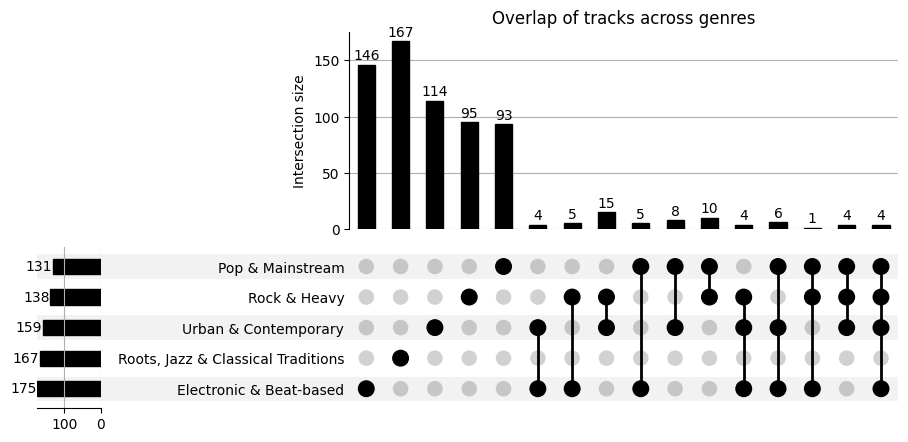

In [110]:
from upsetplot import from_contents, plot
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings from upsetplot library
warnings.filterwarnings('ignore', category=FutureWarning)

# Source - https://stackoverflow.com/a
# Posted by astrofrog, modified by community. See post 'Timeline' for change history
# Retrieved 2026-01-28, License - CC BY-SA 4.0


genre_data = {
    'Pop & Mainstream': df[df['first_genre'] == 1]['track_id'].unique(),
    'Urban & Contemporary': df[df['first_genre'] == 2]['track_id'].unique(),
    'Electronic & Beat-based': df[df['first_genre'] == 3]['track_id'].unique(),
    'Rock & Heavy': df[df['first_genre'] == 4]['track_id'].unique(),
    'Roots, Jazz & Classical Traditions': df[df['first_genre'] == 5]['track_id'].unique()
}

upset_data = from_contents(genre_data)

plot(upset_data, subset_size='count', show_counts=True)
plt.title("Overlap of tracks across genres")
plt.show()


## Note : Total Partitions : Sterling number of 2nd Kind
# Left Bottom : Songs per Genre (repitition is allowed)
# Dots alone : Set containg elements belongs to them alone
# Segments : Interactions of the sets
# The empty intersections are not plotted.

# Ref : 
# https://vdl.sci.utah.edu/publications/2014_infovis_upset/

In [115]:
# Overlap percent

print('Percentage of overlapped tracks in each first_genre:')
print(f'Rock & Heavy: {round(100*(1-(95/138)),2)}%')
print(f'Pop & Mainstream: {round(100*(1-(93/131)),2)}%')
print(f'Urban & Contemporary: {round(100*(1-(114/159)),2)}%')
print(f'Electronic & Beat-based: {round(100*(1-(146/175)),2)}%')
print(f'Roots, Jazz & Classical Traditions: {round(100*(1-(167/167)),2)}%')


Percentage of overlapped tracks in each first_genre:
Rock & Heavy: 31.16%
Pop & Mainstream: 29.01%
Urban & Contemporary: 28.3%
Electronic & Beat-based: 16.57%
Roots, Jazz & Classical Traditions: 0.0%


## Build tracks dataframe which contains all unique tracks 
### Tracks which have overlap, i.e., those tracks which appear in multiple differently seeded playlists will be assigned the lowest occuring values of first_genre and position

In [188]:
# Remove categorical features like key and mode before plotting
features = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Preserve seed tracks
seed_tracks = df[df['position'] < 2][['track_id','track_name', 'position', 'genre_label', 'first_genre']].drop_duplicates().sort_values(['first_genre', 'position']).reset_index(drop=True)
seed_ids = seed_tracks['track_id'].tolist()

tracks = df[['track_id', 'position', 'first_genre', 'track_name'] + features].drop_duplicates()

# Separate dataframe for seed tracks and others
tracks_seeds = tracks[tracks['track_id'].isin(seed_ids) & (tracks['position'] < 2)]
tracks_others = tracks[~tracks['track_id'].isin(seed_ids)]

agg_logic = {col: 'first' for col in features + ['track_name']}
agg_logic.update({'position': 'min', 'first_genre': 'min'})

# Combine other tracks such that the lowest first_genre and position is preserved
tracks_others_agg = tracks_others.groupby('track_id', as_index=False).agg(agg_logic)

# Final tracks = seeds + others (with preserved first_genre and position)
tracks = pd.concat([tracks_seeds, tracks_others_agg], ignore_index=True)

genre_mapping = {
    1: '1. Pop & Mainstream',
    2: '2. Urban & Contemporary',
    3: '3. Electronic & Beat-Based',
    4: '4. Rock & Heavy',
    5: '5. Roots, Jazz & Classical Traditions'
}

genre_color = {
    '1. Pop & Mainstream': '#1DB954',           # Spotify Green
    '2. Urban & Contemporary': '#9146FF',      # Twitch/Urban Purple
    '3. Electronic & Beat-Based': '#FF0050',   # High-energy Neon Red/Pink
    '4. Rock & Heavy': "#00E1FF",              # Dark Grey/Black
    '5. Roots, Jazz & Classical Traditions': '#FF9100' # Warm Orange/Amber
}

tracks['genre'] = tracks['first_genre'].map(genre_mapping)

tracks.head()

,track_id,position,first_genre,track_name,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,7p6oXzBSPAXXz8Xb8gBPki,0,3,Subzero - Original Mix,-1.896346,0.690503,1.104828,0.140412,1.907583,-0.526876,-0.263476,-0.104535,0.083150,-1.328158,3. Electronic & Beat-Based
1,4uUG5RXrOk84mYEfFvj3cK,1,3,I'm Good (Blue),0.725386,-0.881169,-0.101541,1.438181,-0.528372,1.517732,0.694827,-0.610904,0.185117,-0.576221,3. Electronic & Beat-Based
2,40gRh2ZURv5tYBo8yB9Lu3,0,5,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",-0.257764,1.683273,-1.235112,-1.539053,1.952850,-0.471230,-1.150793,-0.486613,-0.042372,-0.847080,"5. Roots, Jazz & Classical Traditions"
3,0G9qcE5Gz6xTz8jWXlRgBx,1,5,I've Got You Under My Skin - 2024 Remastered,-4.386991,1.301231,-0.023543,-1.179168,-0.528392,-0.362194,-0.471018,-0.578680,0.152810,0.838715,"5. Roots, Jazz & Classical Traditions"
4,3ENHpbTuY72FukZbwGP6bc,0,4,Tear Away,-0.454394,-0.889993,0.158452,0.285820,-0.520471,-0.635912,0.585822,-0.460527,0.350263,0.042308,4. Rock & Heavy


In [189]:
tracks.track_id.nunique()

681

## Assigned first-genres

In [190]:
tracks.groupby(['genre'])['track_id'].nunique()

genre
1. Pop & Mainstream                      131
2. Urban & Contemporary                  135
3. Electronic & Beat-Based               152
4. Rock & Heavy                           96
5. Roots, Jazz & Classical Traditions    167
Name: track_id, dtype: int64

## Initial first_genres

In [191]:
df.groupby(['genre_label'])['track_id'].nunique()

genre_label
Electronic & Beat-Based               175
Pop & Mainstream                      131
Rock & Heavy                          138
Roots, Jazz & Classical Traditions    167
Urban & Contemporary                  159
Name: track_id, dtype: int64

## PCA to visualize track features

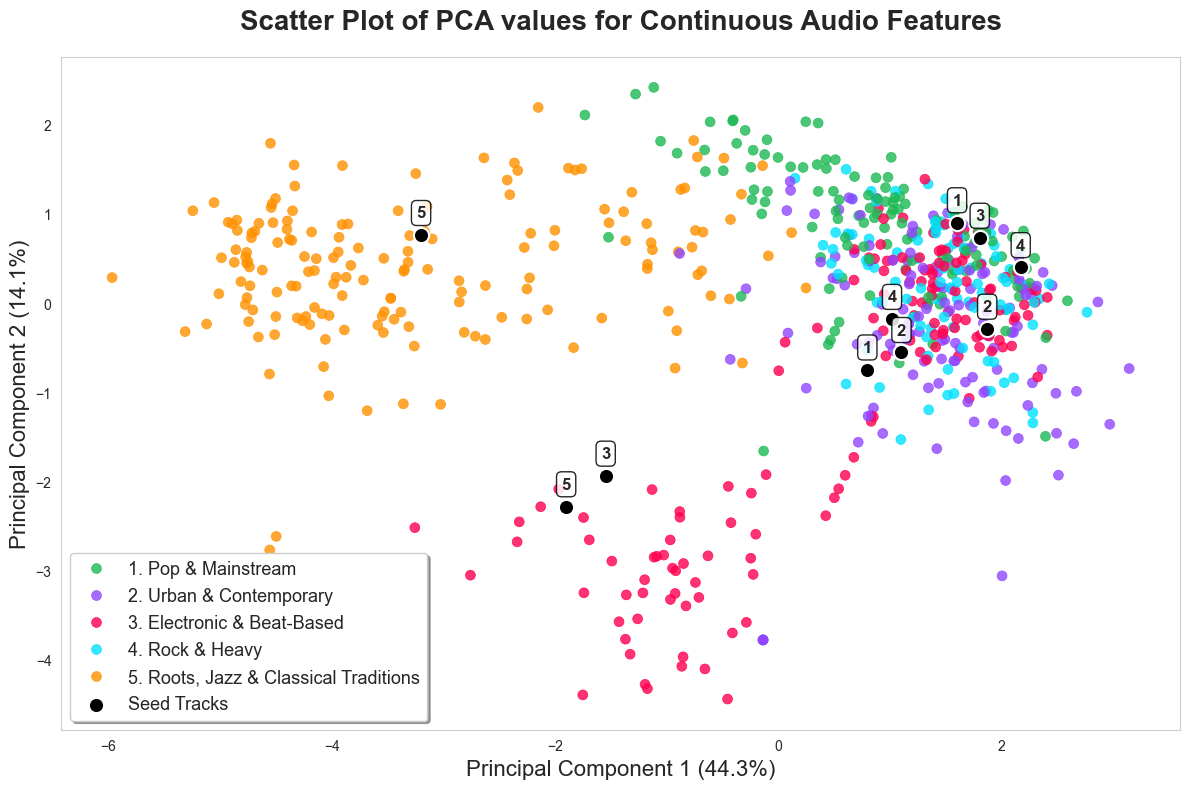

In [202]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize and fit PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(tracks[features])
tracks['pca-one'] = pca_results[:,0]
tracks['pca-two'] = pca_results[:,1]
exp_var = pca.explained_variance_ratio_

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# 2. Main Scatter Plot
ax = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="genre",
    palette=genre_color,
    data=tracks,
    alpha=0.8,
    s=50,
    edgecolor=None
)

# 3. Overlay Seed Tracks
seeds_to_label = tracks[tracks['track_id'].isin(seed_tracks['track_id'])]

sns.scatterplot(
    x="pca-one", y="pca-two",
    data=seeds_to_label,
    color='black',
    s=120,         
    marker='o',   
    edgecolor='white',
    linewidth=1.5,
    label='Seed Tracks',
    zorder=5      
)

# 4. Enhanced Seed Labels
for i in range(len(seeds_to_label)):
    plt.text(
        x=seeds_to_label.iloc[i]['pca-one'],
        y=seeds_to_label.iloc[i]['pca-two'] + 0.2, # Adjust offset based on data scale
        s=seeds_to_label.iloc[i]['first_genre'], 
        fontsize=12,
        weight='bold',
        ha='center',
        bbox=dict(facecolor='white', alpha=0.85, edgecolor='black', boxstyle='round,pad=0.3'),
        zorder=10
    )

# 5. Formatting with Bigger Fonts
plt.title(f'Scatter Plot of PCA values for Continuous Audio Features', 
          fontsize=20, pad=20, weight='bold')
plt.xlabel(f'Principal Component 1 ({exp_var[0]*100:.1f}%)', fontsize=16)
plt.ylabel(f'Principal Component 2 ({exp_var[1]*100:.1f}%)', fontsize=16)

# --- REARRANGE LEGEND ALPHABETICALLY ---
handles, labels = ax.get_legend_handles_labels()

# Sort both lists by the label name
sorted_legend = sorted(zip(labels, handles), key=lambda x: x[0])
sorted_labels, sorted_handles = zip(*sorted_legend)

# Apply the sorted legend
plt.legend(
    sorted_handles, 
    sorted_labels, 
    loc='lower left', 
    fontsize=13, 
    frameon=True, 
    shadow=True, 
    title_fontsize=14
)

# sns.despine()
# plt.xlim(-7, 4)
# plt.ylim(-6, 3)
plt.grid(False)
plt.tight_layout()
plt.show()